In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [6]:
data = pd.read_csv('mnist_train.csv')

In [7]:
data.head()

,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
data.shape

(59999, 785)

In [10]:
data = np.array(data)

In [13]:
m, n = data.shape

m,n

(59999, 785)

In [4]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [19]:
Y_train

array([7, 7, 4, ..., 8, 0, 8], dtype=int64)

In [20]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [22]:
np.random.rand(1,3)

array([[0.20471409, 0.80866149, 0.227907  ]])

In [21]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

In [23]:
def ReLU(Z):
    return np.maximum(Z, 0)

In [24]:
def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

In [25]:
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

In [26]:
def ReLU_deriv(Z):
    return Z > 0

In [27]:
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

In [28]:

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [29]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[8 7 5 ... 7 0 5] [7 7 4 ... 8 0 8]
0.13561246800793234
Iteration:  10
[8 7 0 ... 7 0 5] [7 7 4 ... 8 0 8]
0.18818963033271752
Iteration:  20
[8 7 4 ... 0 0 8] [7 7 4 ... 8 0 8]
0.2555297547416058
Iteration:  30
[8 7 4 ... 1 0 3] [7 7 4 ... 8 0 8]
0.3143782098001661
Iteration:  40
[8 7 0 ... 1 0 3] [7 7 4 ... 8 0 8]
0.3640231190359159
Iteration:  50
[8 7 0 ... 1 0 1] [7 7 4 ... 8 0 8]
0.41756639943049884
Iteration:  60
[8 4 4 ... 1 0 8] [7 7 4 ... 8 0 8]
0.467685892981237
Iteration:  70
[8 4 4 ... 1 0 8] [7 7 4 ... 8 0 8]
0.503025475008051
Iteration:  80
[8 7 9 ... 1 0 8] [7 7 4 ... 8 0 8]
0.5355683994643977
Iteration:  90
[8 7 9 ... 1 0 8] [7 7 4 ... 8 0 8]
0.5645519415583315
Iteration:  100
[8 7 9 ... 1 0 8] [7 7 4 ... 8 0 8]
0.5916032475126697
Iteration:  110
[8 7 9 ... 1 0 8] [7 7 4 ... 8 0 8]
0.612790047288937
Iteration:  120
[8 7 9 ... 1 0 1] [7 7 4 ... 8 0 8]
0.6310445939761691
Iteration:  130
[8 7 9 ... 1 0 1] [7 7 4 ... 8 0 8]
0.6462651909354395
Iteration:  140
[

In [30]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions


In [31]:
def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [7]
Label:  7


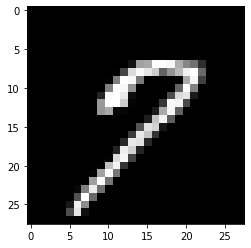

Prediction:  [7]
Label:  7


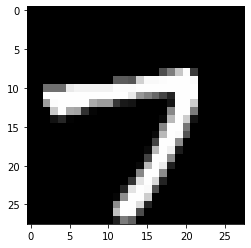

Prediction:  [5]
Label:  4


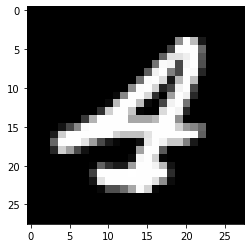

Prediction:  [0]
Label:  0


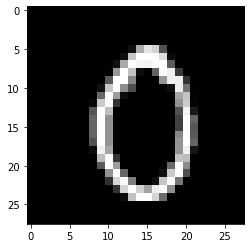

In [32]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)